**IMPORTING LIBRARIES**

In [2]:
import pandas as pd
import numpy as np

- Importing data into dataframe from csv

In [3]:
df=pd.read_csv("Patient_Health_Data.csv")

- Reading First 5 rows of the dataset

In [4]:
df.head(5)

,Patient_ID,Height_cm,Weight_kg,Blood_Pressure,Temperature_C,Heart_Rate,Symptoms,Existing_Conditions,Disease_Predictions,Laboratory_Test_Results,Cholesterol_mg_dL,Blood_Sugar_mg_dL,Family_History_Heart_Disease,Smoking_Status
0,P0001,174.0,59.0,120/80,36.6,63.0,chest pain,Diabetes,Heart Disease,High Cholesterol,198.0,79.0,Yes,Never
1,P0002,NaN,67.0,130/85,37.0,68.0,shortness of breath,Hypertension,Coronary Artery Disease,NaN,179.0,90.0,No,Former
2,P0003,176.0,58.0,140/90,37.0,65.0,fatigue,High Cholesterol,Arrhythmia,Normal,193.0,82.0,NaN,Current
3,P0004,185.0,65.0,125/82,37.2,69.0,dizziness,NaN,NaN,NaN,228.0,103.0,No,Never
4,P0005,167.0,41.0,135/88,36.3,72.0,palpitations,Asthma,Hypertension,NaN,251.0,135.0,Yes,Former


- Finding columns name

In [5]:
df.columns

Index(['Patient_ID', 'Height_cm', 'Weight_kg', 'Blood_Pressure',
       'Temperature_C', 'Heart_Rate', 'Symptoms', 'Existing_Conditions',
       'Disease_Predictions', 'Laboratory_Test_Results', 'Cholesterol_mg_dL',
       'Blood_Sugar_mg_dL', 'Family_History_Heart_Disease', 'Smoking_Status'],
      dtype='object')

- Finding number of ROWS and COLUMNS

In [6]:
df.shape

(2000, 14)

- Basic info of data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_ID                    2000 non-null   object 
 1   Height_cm                     1915 non-null   float64
 2   Weight_kg                     1914 non-null   float64
 3   Blood_Pressure                1640 non-null   object 
 4   Temperature_C                 1892 non-null   float64
 5   Heart_Rate                    1903 non-null   float64
 6   Symptoms                      1562 non-null   object 
 7   Existing_Conditions           1488 non-null   object 
 8   Disease_Predictions           1488 non-null   object 
 9   Laboratory_Test_Results       1505 non-null   object 
 10  Cholesterol_mg_dL             1899 non-null   float64
 11  Blood_Sugar_mg_dL             1880 non-null   float64
 12  Family_History_Heart_Disease  1891 non-null   object 
 13  Smo

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height_cm,1915.0,169.902350,9.842987,137.0,163.0,170.0,176.0,208.0
Weight_kg,1914.0,69.388715,15.047664,24.0,59.0,70.0,79.0,128.0
Temperature_C,1892.0,36.970983,0.497384,35.4,36.7,37.0,37.3,38.6
Heart_Rate,1903.0,74.567525,10.325641,38.0,67.0,74.0,82.0,110.0
Cholesterol_mg_dL,1899.0,199.612954,39.454690,43.0,174.0,200.0,226.0,335.0
Blood_Sugar_mg_dL,1880.0,99.007447,29.952720,-1.0,79.0,99.0,119.0,201.0


Spliting columns based on data type

In [9]:
num_columns = df.select_dtypes(include=[np.number]).columns
cat_columns = df.select_dtypes(exclude=[np.number]).columns

In [10]:
print("Numerical columns \n",num_columns)
print("Categorical columns \n",cat_columns)

Numerical columns 
 Index(['Height_cm', 'Weight_kg', 'Temperature_C', 'Heart_Rate',
       'Cholesterol_mg_dL', 'Blood_Sugar_mg_dL'],
      dtype='object')
Categorical columns 
 Index(['Patient_ID', 'Blood_Pressure', 'Symptoms', 'Existing_Conditions',
       'Disease_Predictions', 'Laboratory_Test_Results',
       'Family_History_Heart_Disease', 'Smoking_Status'],
      dtype='object')


**Cleaning Numerical Columns**

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt

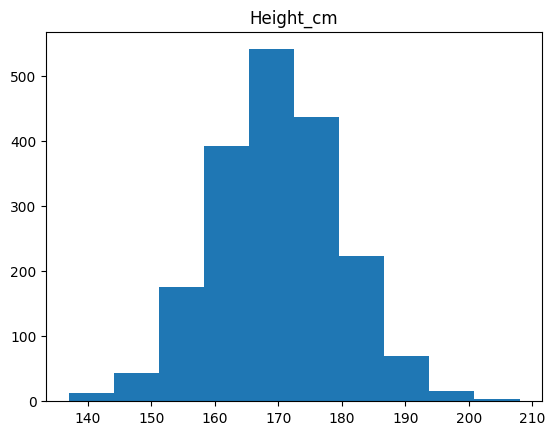

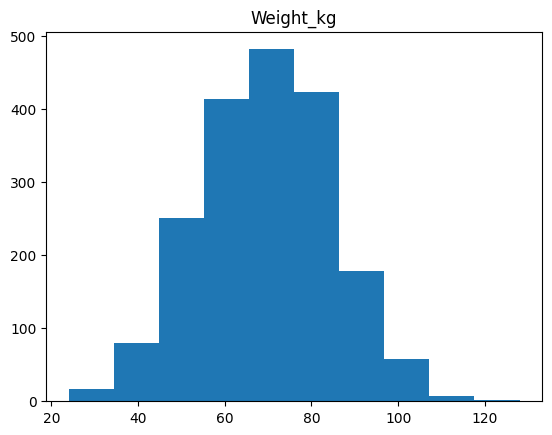

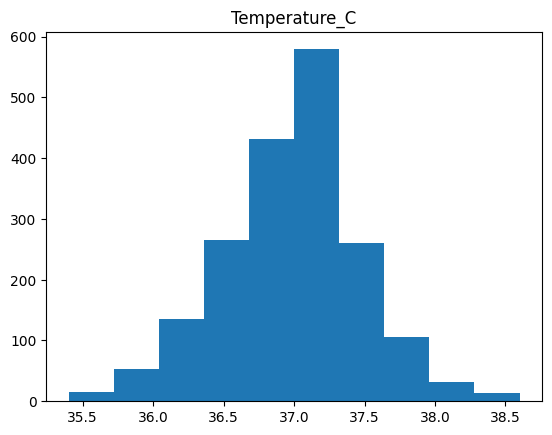

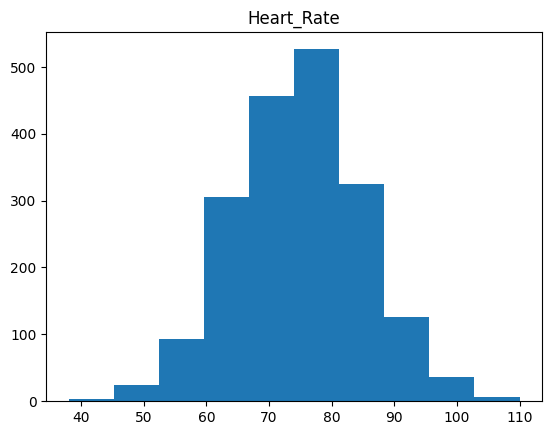

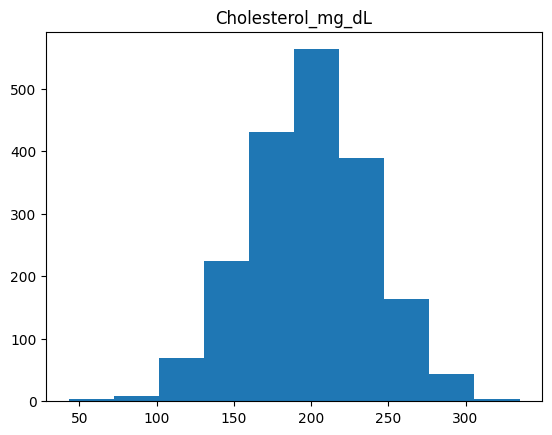

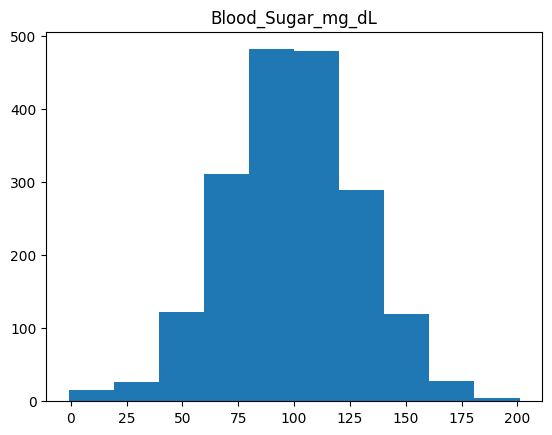

In [12]:
for col in num_columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

As all the numerical data are in form of Normal distribution hence null values can be replaced by mean values.

In [13]:
for col in num_columns:
        df[col].fillna(df[col].mean(), inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_ID                    2000 non-null   object 
 1   Height_cm                     2000 non-null   float64
 2   Weight_kg                     2000 non-null   float64
 3   Blood_Pressure                1640 non-null   object 
 4   Temperature_C                 2000 non-null   float64
 5   Heart_Rate                    2000 non-null   float64
 6   Symptoms                      1562 non-null   object 
 7   Existing_Conditions           1488 non-null   object 
 8   Disease_Predictions           1488 non-null   object 
 9   Laboratory_Test_Results       1505 non-null   object 
 10  Cholesterol_mg_dL             2000 non-null   float64
 11  Blood_Sugar_mg_dL             2000 non-null   float64
 12  Family_History_Heart_Disease  1891 non-null   object 
 13  Smo

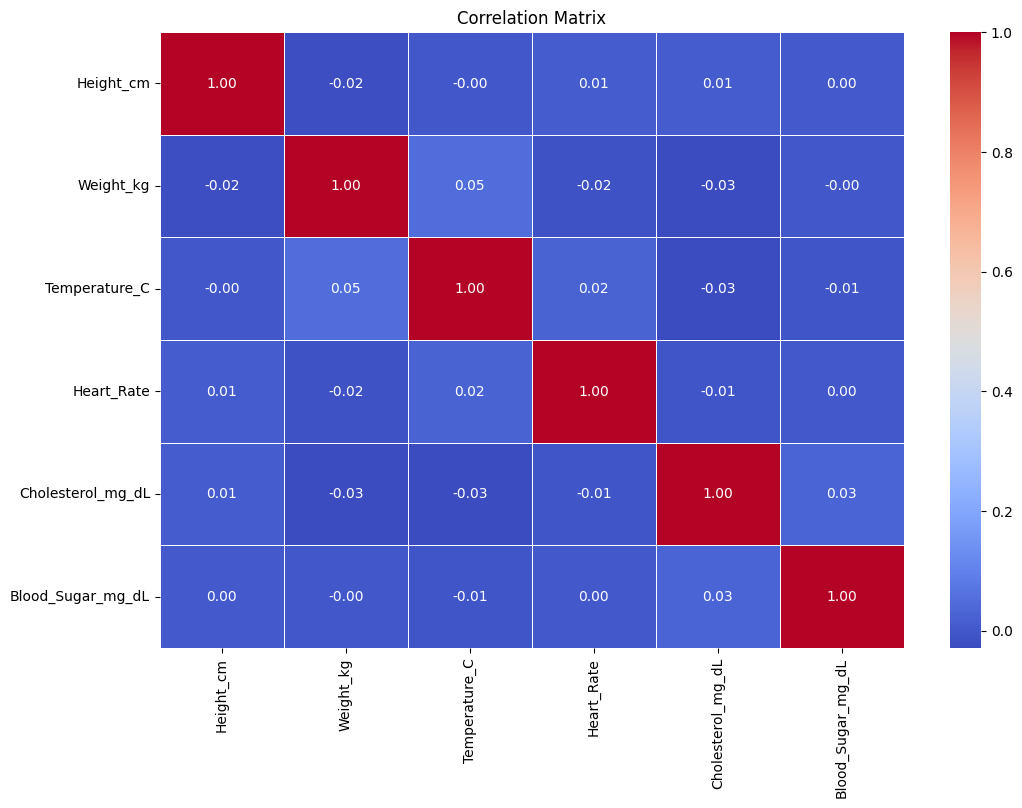

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns from the DataFrame
num_data = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = num_data.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


From the above confusion matrix we can see there is a no significant relation between any two columns

As from the dataset we know that the Disease_Predictions is our TARGET VARIABLE.

In [16]:
df["Disease_Predictions"].isnull().sum()

512

In [17]:
df["Existing_Conditions"].unique()

array(['Diabetes', 'Hypertension', 'High Cholesterol', nan, 'Asthma',
       'Thyroid'], dtype=object)

In [18]:
df["Disease_Predictions"].unique()

array(['Heart Disease', 'Coronary Artery Disease', 'Arrhythmia', nan,
       'Hypertension', 'Stroke'], dtype=object)

In [19]:
df.groupby('Existing_Conditions')["Disease_Predictions"].value_counts()

Existing_Conditions  Disease_Predictions    
Asthma               Hypertension               266
Diabetes             Heart Disease              269
High Cholesterol     Arrhythmia                 267
Hypertension         Coronary Artery Disease    261
Name: count, dtype: int64

From the above cell we can see there is a realtion between Existing_Conditions and Disease_Predictions Columns.

Hence using Existing_Conditions columns to fill null values of Disease_Predictions column.

In [20]:
df.loc[(df['Existing_Conditions'] == 'Diabetes') & (df['Disease_Predictions'].isna()), 'Disease_Predictions'] = 'Heart Disease'

In [21]:
df.loc[(df['Existing_Conditions'] == 'Asthma') & (df['Disease_Predictions'].isna()), 'Disease_Predictions'] = 'Hypertension'

In [22]:
df.loc[(df['Existing_Conditions'] == 'High Cholesterol') & (df['Disease_Predictions'].isna()), 'Disease_Predictions'] = 'Arrhythmia'

In [23]:
df.loc[(df['Existing_Conditions'] == 'Hypertension') & (df['Disease_Predictions'].isna()), 'Disease_Predictions'] ='Coronary Artery Disease'

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_ID                    2000 non-null   object 
 1   Height_cm                     2000 non-null   float64
 2   Weight_kg                     2000 non-null   float64
 3   Blood_Pressure                1640 non-null   object 
 4   Temperature_C                 2000 non-null   float64
 5   Heart_Rate                    2000 non-null   float64
 6   Symptoms                      1562 non-null   object 
 7   Existing_Conditions           1488 non-null   object 
 8   Disease_Predictions           1611 non-null   object 
 9   Laboratory_Test_Results       1505 non-null   object 
 10  Cholesterol_mg_dL             2000 non-null   float64
 11  Blood_Sugar_mg_dL             2000 non-null   float64
 12  Family_History_Heart_Disease  1891 non-null   object 
 13  Smo

Removing the NULL values of Disease_Predictions columns which is left after data procesing

In [25]:
df = df.dropna(subset=['Disease_Predictions'])

Filling NULL Values of Categorical values with mode

In [26]:
for col in cat_columns:
    df[col].fillna(df[col].mode(), inplace=True)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1611 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_ID                    1611 non-null   object 
 1   Height_cm                     1611 non-null   float64
 2   Weight_kg                     1611 non-null   float64
 3   Blood_Pressure                1320 non-null   object 
 4   Temperature_C                 1611 non-null   float64
 5   Heart_Rate                    1611 non-null   float64
 6   Symptoms                      1254 non-null   object 
 7   Existing_Conditions           1186 non-null   object 
 8   Disease_Predictions           1611 non-null   object 
 9   Laboratory_Test_Results       1211 non-null   object 
 10  Cholesterol_mg_dL             1611 non-null   float64
 11  Blood_Sugar_mg_dL             1611 non-null   float64
 12  Family_History_Heart_Disease  1515 non-null   object 
 13  Smoking_

In [28]:
df.isnull().sum()

Patient_ID                        0
Height_cm                         0
Weight_kg                         0
Blood_Pressure                  291
Temperature_C                     0
Heart_Rate                        0
Symptoms                        357
Existing_Conditions             425
Disease_Predictions               0
Laboratory_Test_Results         400
Cholesterol_mg_dL                 0
Blood_Sugar_mg_dL                 0
Family_History_Heart_Disease     96
Smoking_Status                   74
dtype: int64

Saving the CLeaned data for futher use.

In [29]:
df.to_excel("Patient_Health_Data_Cleaned.xlsx", index=False)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [31]:
data=pd.read_excel("Patient_Health_Data_Cleaned.xlsx")

Encode categorical variables

In [32]:
encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = encoder.fit_transform(data[col])

Define features and target

In [33]:
X = data.drop('Disease_Predictions', axis=1)
y = data['Disease_Predictions']

Train-Test-Validation Split

In [34]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=48)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=48)


Scale the features

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Train KNN Model

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors based on validation set
knn.fit(X_train, y_train)

KNeighborsClassifier()

Validate the Model

In [37]:
y_val_pred = knn.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))


Validation Accuracy: 0.8471074380165289


Test the Model

In [38]:
y_test_pred = knn.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Test Accuracy: 0.9090909090909091


Classification Report

In [39]:
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        50
           1       0.88      0.86      0.87        50
           2       0.93      0.96      0.95        54
           3       1.00      0.85      0.92        52
           4       0.79      0.86      0.83        36

    accuracy                           0.91       242
   macro avg       0.91      0.91      0.90       242
weighted avg       0.91      0.91      0.91       242



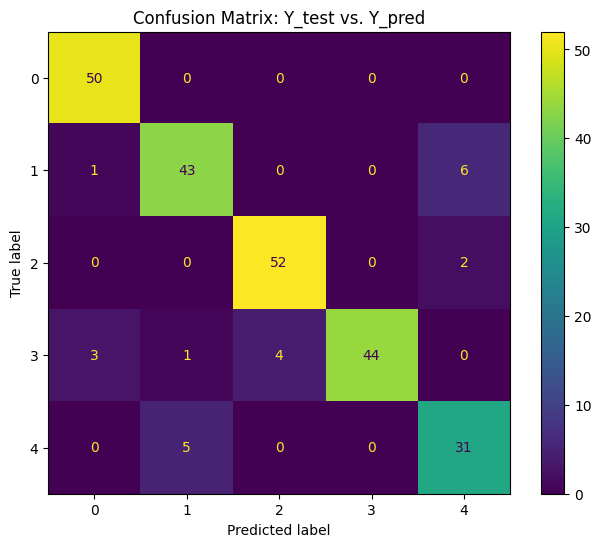

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
plt.figure(figsize=(8, 6))
disp.plot(cmap="viridis", ax=plt.gca())  # Use the same figure
plt.title("Confusion Matrix: Y_test vs. Y_pred")
plt.show()

Save the trained model to a file

In [40]:
import joblib

joblib.dump(knn, 'knn_model_hdp.joblib')

['knn_model_hdp.joblib']

confusion matrix,saved the data after standard scaler,use validation for dfferent values of k